# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Final term project</b></u>

### Roster Name: Preet LNU
### Student ID: 014755741
### Email address: preet.lnu@sjsu.edu


##  <u> Project description/introduction text (the background information) </u>

A heart attack is a medical emergency. A heart attack usually occurs when a blood clot blocks blood flow to the heart. Without blood, tissue loses oxygen and dies. Symptoms include tightness or pain in the chest, neck, back, or arms, as well as fatigue, lightheadedness, abnormal heartbeat, and anxiety. I will be using AI to predict heart attack for the patient by analyzing data like cholesterol, heart beats, blood pressure, etc. I will be using a dataset which has observations from different patients. 

##  <u> Machine learning algorithm selected for this project </u>

The machine leaning model I used in this project was Decision Trees.Decision Tree algorith is a hierarchical tree which can be traversed to make a decisions, they make decisions top to bottom, by splitting nodes into sub-nodes based on some criteria. Most decision trees are binary (bifurcating splits) but not a requirement. 

##  <u> Dataset source </u>

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

##  <u> References and sources </u>

DecisionTress.Breast.ipynb

Homework 5

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
np.random.seed(42)

#### Loading dataset

In [ ]:
heart_file = pd.read_csv(r'/content/heart.csv')

In [ ]:
df = pd.DataFrame(heart_file, columns=heart_file.columns)
columns = df.columns[:-1]
X = df[columns]
Y = df['output']
class_names = ["No output - 0", "output - 1"]

print(X.shape, Y.shape)
df.head()

(303, 13) (303,)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Replacing null values if any

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

####Breaking data for Training and Testing

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((242, 13), (242,), (61, 13), (61,))

#### Train Decision Tree Model and Report 5-fold cross-validation accuracy & mean accuracy

In [ ]:
model = DecisionTreeClassifier(random_state=0)

cross_vals = cross_val_score(model, X_train, Y_train, cv=5)
print('Individual cross-validation accuracies: ' + str(cross_vals))
print('Mean cross validation accuracy: ' + str(cross_vals.mean()))

Individual cross-validation accuracies: [0.88 0.78 0.75 0.67 0.83]
Mean cross validation accuracy: 0.7806122448979591


#### Train Tree on Training Data and Report Prediction Accuracy on Test Data

In [ ]:
model.fit(X_train, Y_train)
print('Accuracy of decision tree model on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of decision tree model on test set: {:.2f}'.format(model.score(X_test, Y_test)))
model_score = model.score(X_test, Y_test)

Accuracy of decision tree model on training set: 1.00
Accuracy of decision tree model on test set: 0.77


#### Plotting decision tree and confusion matrix

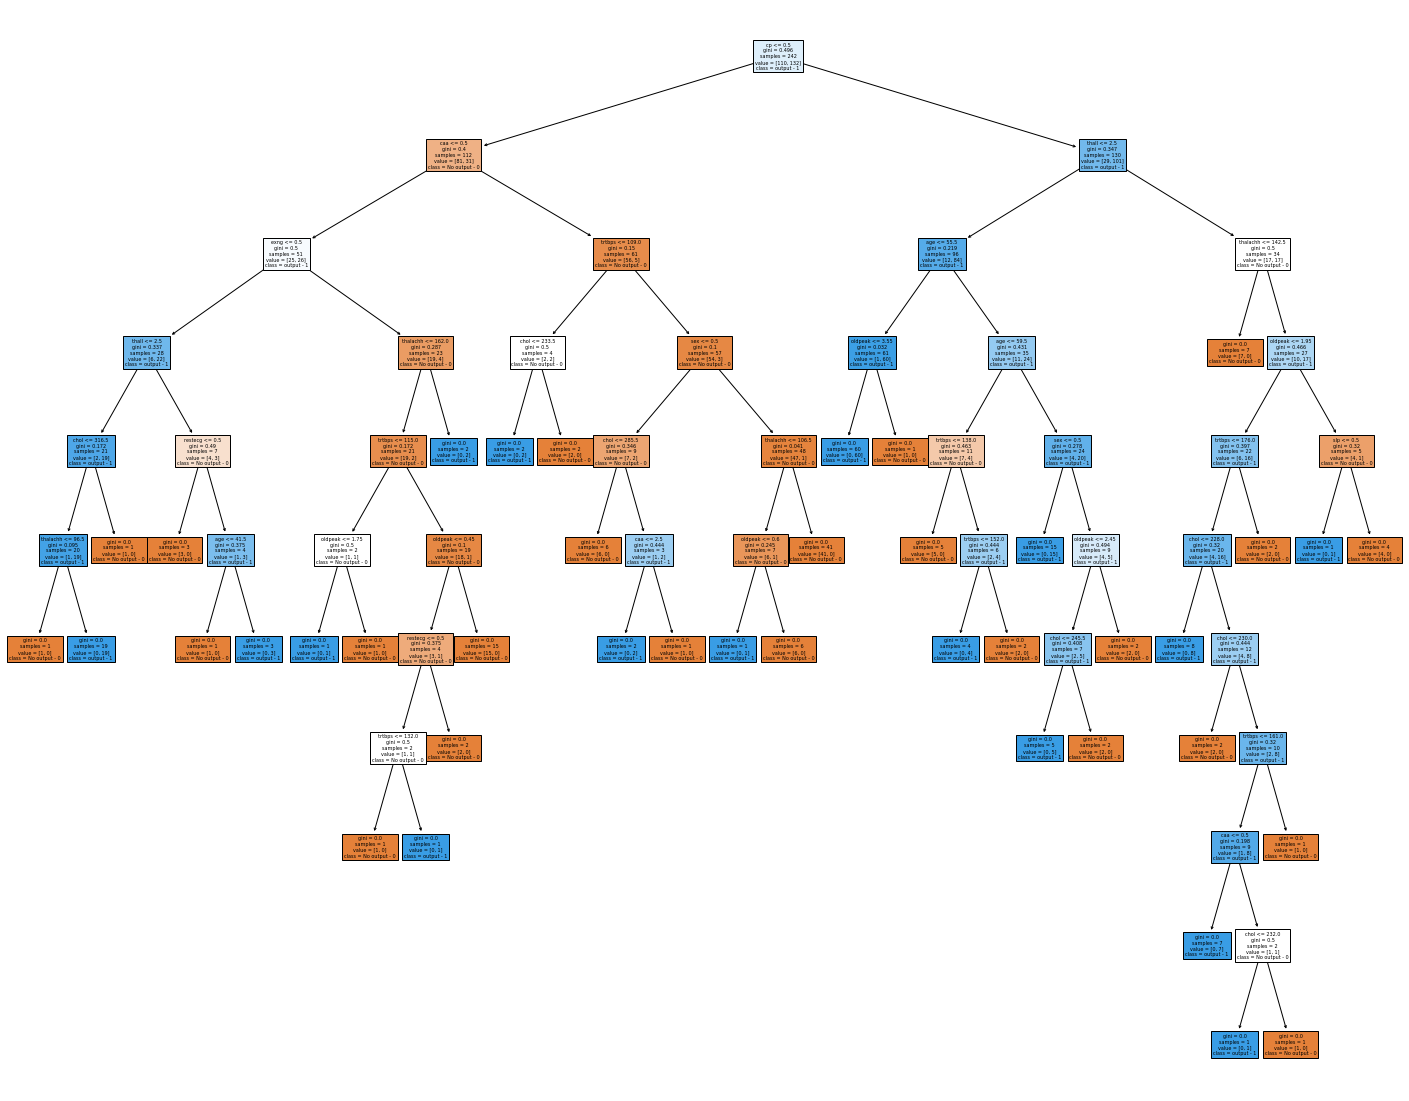

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=columns, class_names=class_names, filled=True)

Confusion matrix, without normalization with accuracy: 1.00
[[110   0]
 [  0 132]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


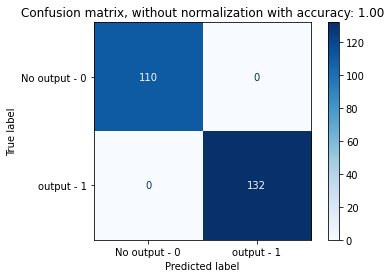

In [ ]:
np.set_printoptions(precision=2)
titles_options = [(("Confusion matrix, without normalization with accuracy: {:.2f}".format(model.score(X_train, Y_train))), None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, Y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization with accuracy: 0.77
[[22  6]
 [ 8 25]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


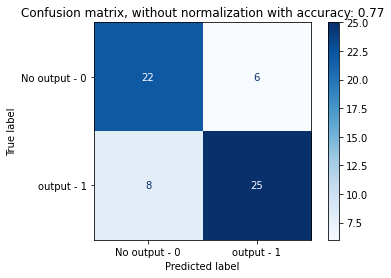

In [ ]:
np.set_printoptions(precision=2)
titles_options = [(("Confusion matrix, without normalization with accuracy: {:.2f}".format(model.score(X_test, Y_test))), None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()